# Coding Discussion 03

# Instructions

## Task

Please read in the Chicago Summer 2018 Crimes Dataset located in the repository folder.

Using the data wrangling methods covered in class this week, create a new data frame where:

- the **_unit of observation_** is the crime type (i.e. `primary_type`),
- the **_column variables_** corresponds with the **_day of the month_**, and
- **_each cell_** is populated by the **_proportion of times that crime type was committed over all days of the month_**
    + For example, assume there were just two days in a month and 2 thefts were committed on the first day, and 1 on the second day, then the _proportion_ of thefts committed on the first day would be .66 and .33 on the second day).

Make sure that:

- all missing values are filled with zeros. Zeros in this case means no crimes were committed that day;
- the data is rounded to the second decimal place; and
- the data frame is printed at the end of the notebook.


## Things to keep in mind

To answer this question: we'll want to think carefully about assigning an index, aggregating data by groups, and reshaping data. Everything you need is in the lecture notes.

In [1]:
# Import data and libraries 
import pandas as pd
import seaborn as sns
chicago_crime = pd.read_csv("/Users/loomanke/Desktop/Practice_1/coding_discussions_ppol564_fall2021/03_coding_discussion/chicago_summer_2018_crime_data.csv")

In [13]:
# Survey data 
chicago_crime.head()

,month,day,year,day_of_week,description,location_description,block,primary_type,district,ward,arrest,domestic,latitude,longitude
0,8,4,2018,Saturday,FROM BUILDING,APARTMENT,039XX W WASHINGTON BLVD,THEFT,11,28.0,False,False,NaN,NaN
1,7,26,2018,Thursday,POCKET-PICKING,RESTAURANT,005XX W MADISON ST,THEFT,1,42.0,False,False,NaN,NaN
2,6,24,2018,Sunday,BOGUS CHECK,GROCERY FOOD STORE,004XX E 34TH ST,DECEPTIVE PRACTICE,2,4.0,False,False,NaN,NaN
3,6,13,2018,Wednesday,SIMPLE,RESIDENCE,098XX S EXCHANGE AVE,ASSAULT,4,10.0,False,True,NaN,NaN
4,6,14,2018,Thursday,TO VEHICLE,STREET,001XX S WALLER AVE,CRIMINAL DAMAGE,15,29.0,False,False,NaN,NaN


In [14]:
# Use crosstab function to assess percentage of crimes committed on each day for a particular crime type 
crime_perc = pd.crosstab(index = chicago_crime['primary_type'], columns = chicago_crime['day'], normalize = 'index').round(2)
crime_perc

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
primary_type,,,,,,,,,,,,,,,,,,,,,
ARSON,0.04,0.03,0.03,0.02,0.04,0.05,0.04,0.04,0.02,0.02,...,0.04,0.01,0.05,0.01,0.02,0.01,0.03,0.05,0.03,0.03
ASSAULT,0.04,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.02
BATTERY,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02
BURGLARY,0.04,0.03,0.03,0.03,0.03,0.04,0.03,0.03,0.03,0.03,...,0.04,0.03,0.04,0.03,0.03,0.04,0.03,0.03,0.03,0.02
CONCEALED CARRY LICENSE VIOLATION,0.05,0.02,0.05,0.05,0.02,0.05,0.05,0.00,0.02,0.05,...,0.02,0.00,0.05,0.07,0.07,0.02,0.02,0.00,0.02,0.05
CRIM SEXUAL ASSAULT,0.06,0.02,0.04,0.05,0.04,0.04,0.03,0.04,0.03,0.03,...,0.03,0.03,0.02,0.03,0.05,0.03,0.03,0.03,0.03,0.01
CRIMINAL DAMAGE,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.04,0.04,0.03,0.03,0.04,0.04,0.03,0.03,0.03,0.02
CRIMINAL TRESPASS,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.03,...,0.03,0.04,0.04,0.03,0.03,0.04,0.04,0.03,0.03,0.02
DECEPTIVE PRACTICE,0.04,0.04,0.03,0.03,0.03,0.04,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.04,0.03,0.03,0.03,0.03


## Alternative method (in case crosstab is not allowed)

In [15]:
# Explore data 
# Find total number of occurences for each crime type 
crime_total= chicago_crime.groupby(["primary_type"])[["day"]].count()
crime_total.head()

,day
primary_type,
ARSON,112
ASSAULT,5635
BATTERY,14111
BURGLARY,3390
CONCEALED CARRY LICENSE VIOLATION,44


In [16]:
# Drop columns 
chicago_small = chicago_crime.drop(columns = ['block', 'location_description', 'description','month', 'year', 'day_of_week', 'district', 'domestic', 'latitude', 'longitude', 'ward', 'arrest'])

# Assign dummy variable column for instance 
chicago_small = chicago_small.assign(dummy = 1)
chicago_small.head()

,day,primary_type,dummy
0,4,THEFT,1
1,26,THEFT,1
2,24,DECEPTIVE PRACTICE,1
3,13,ASSAULT,1
4,14,CRIMINAL DAMAGE,1


In [17]:
# Create pivot table df 
final = chicago_small.pivot_table(index = ['primary_type'], columns = ['day'], aggfunc = 'count', fill_value = 0)
# Add new column summing occurence total 
final = final.assign(sum = final.sum(axis=1))
final.head()

dummy                                     \
day                                   1    2    3    4    5    6    7    8   
primary_type                                                                 
ARSON                                 4    3    3    2    4    6    5    5   
ASSAULT                             207  188  172  202  209  197  172  195   
BATTERY                             511  495  489  576  488  400  455  474   
BURGLARY                            126  109  118  117  101  126   99   96   
CONCEALED CARRY LICENSE VIOLATION     2    1    2    2    1    2    2    0   

                                             ...                             \
day                                  9   10  ...     23   24   25   26   27   
primary_type                                 ...                              
ARSON                                2    2  ...      1    6    1    2    1   
ASSAULT                            161  154  ...    182  200  167  174  187   
BATTERY                            432  438  ...    439  476  485  460  393   
BURGLARY                           107  110  ...    102  119  104  104  140   
CONCEALED CARRY LICENSE VIOLATION    1    2  ...      0    2    3    3    1   

                                                         sum  
day                                 28   29   30   31         
primary_type                                                  
ARSON                                3    6    3    3    112  
ASSAULT                            177  194  161  133   5635  
BATTERY                            450  432  442  274  14111  
BURGLARY                           113  107  108   79   3390  
CONCEALED CARRY LICENSE VIOLATION    1    0    1    2     44  

[5 rows x 32 columns]

In [18]:
# Calculate crime average
crime_avg = (final.iloc[0]/final.iloc[0,-1]).round(2)
crime_avg.head()

       day
dummy  1      0.04
       2      0.03
       3      0.03
       4      0.02
       5      0.04
Name: ARSON, dtype: float64

In [19]:
def crime_avg(final):
    ''' 
    Takes a df; returns a df where row values are divided by final column value
    
    Arguments
    --------------
    final : pd df (row: crime type, columns: days)
        
    Return
    --------------
        Df of crime type's averages 
    '''
    for x in range(len(final)): 
        final.iloc[x] = (final.iloc[x] / final.iloc[x, -1]).round(2)
    return final

# Call function 
x = crime_avg(final)

In [20]:
x

dummy                                      \
day                                   1     2     3     4     5     6     7   
primary_type                                                                  
ARSON                              0.04  0.03  0.03  0.02  0.04  0.05  0.04   
ASSAULT                            0.04  0.03  0.03  0.04  0.04  0.03  0.03   
BATTERY                            0.04  0.04  0.03  0.04  0.03  0.03  0.03   
BURGLARY                           0.04  0.03  0.03  0.03  0.03  0.04  0.03   
CONCEALED CARRY LICENSE VIOLATION  0.05  0.02  0.05  0.05  0.02  0.05  0.05   
CRIM SEXUAL ASSAULT                0.06  0.02  0.04  0.05  0.04  0.04  0.03   
CRIMINAL DAMAGE                    0.03  0.03  0.03  0.03  0.03  0.03  0.03   
CRIMINAL TRESPASS                  0.04  0.03  0.03  0.03  0.03  0.03  0.03   
DECEPTIVE PRACTICE                 0.04  0.04  0.03  0.03  0.03  0.04  0.03   
GAMBLING                           0.07  0.03  0.02  0.01  0.03  0.02  0.03   
HOMICIDE                           0.02  0.00  0.03  0.02  0.06  0.03  0.02   
HUMAN TRAFFICKING                  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
INTERFERENCE WITH PUBLIC OFFICER   0.03  0.02  0.05  0.03  0.02  0.04  0.04   
INTIMIDATION                       0.02  0.04  0.00  0.04  0.02  0.04  0.02   
KIDNAPPING                         0.02  0.04  0.02  0.04  0.09  0.02  0.00   
LIQUOR LAW VIOLATION               0.02  0.05  0.05  0.02  0.02  0.01  0.04   
MOTOR VEHICLE THEFT                0.03  0.03  0.04  0.03  0.02  0.04  0.03   
NARCOTICS                          0.04  0.03  0.04  0.03  0.03  0.04  0.03   
NON-CRIMINAL                       0.00  0.00  0.00  0.00  0.00  0.12  0.00   
NON-CRIMINAL (SUBJECT SPECIFIED)   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
OBSCENITY                          0.14  0.00  0.05  0.10  0.00  0.05  0.00   
OFFENSE INVOLVING CHILDREN         0.06  0.03  0.04  0.04  0.03  0.02  0.03   
OTHER OFFENSE                      0.04  0.03  0.03  0.03  0.03  0.04  0.04   
PROSTITUTION                       0.06  0.01  0.02  0.01  0.02  0.02  0.00   
PUBLIC INDECENCY                   0.00  0.00  0.00  0.20  0.00  0.00  0.00   
PUBLIC PEACE VIOLATION             0.03  0.04  0.03  0.05  0.03  0.05  0.03   
ROBBERY                            0.04  0.03  0.03  0.03  0.03  0.03  0.03   
SEX OFFENSE                        0.03  0.04  0.01  0.04  0.03  0.03  0.04   
STALKING                           0.06  0.07  0.06  0.06  0.00  0.06  0.00   
THEFT                              0.03  0.04  0.04  0.03  0.03  0.03  0.03   
WEAPONS VIOLATION                  0.03  0.03  0.03  0.04  0.04  0.03  0.03   

                                                    ...                     \
day                                   8     9    10 ...     23    24    25   
primary_type                                        ...                      
ARSON                              0.04  0.02  0.02 ...   0.01  0.05  0.01   
ASSAULT                            0.03  0.03  0.03 ...   0.03  0.04  0.03   
BATTERY                            0.03  0.03  0.03 ...   0.03  0.03  0.03   
BURGLARY                           0.03  0.03  0.03 ...   0.03  0.04  0.03   
CONCEALED CARRY LICENSE VIOLATION  0.00  0.02  0.05 ...   0.00  0.05  0.07   
CRIM SEXUAL ASSAULT                0.04  0.03  0.03 ...   0.03  0.02  0.03   
CRIMINAL DAMAGE                    0.03  0.03  0.03 ...   0.04  0.03  0.03   
CRIMINAL TRESPASS                  0.04  0.04  0.03 ...   0.04  0.04  0.03   
DECEPTIVE PRACTICE                 0.03  0.03  0.03 ...   0.03  0.03  0.03   
GAMBLING                           0.03  0.05  0.04 ...   0.02  0.01  0.04   
HOMICIDE                           0.08  0.05  0.05 ...   0.03  0.03  0.03   
HUMAN TRAFFICKING                  0.00  0.00  0.00 ...   0.00  0.00  0.00   
INTERFERENCE WITH PUBLIC OFFICER   0.05  0.04  0.05 ...   0.03  0.02  0.03   
INTIMIDATION                       0.02  0.04  0.06 ...   0.04  0.00  0.07   
KIDNAPPING           

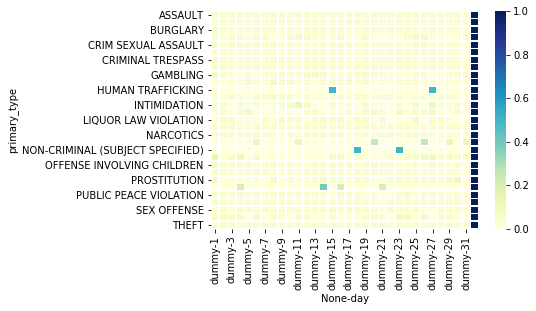

In [47]:
sns.heatmap(x[1:30], cmap='YlGnBu', fmt='f', linewidths=.5);